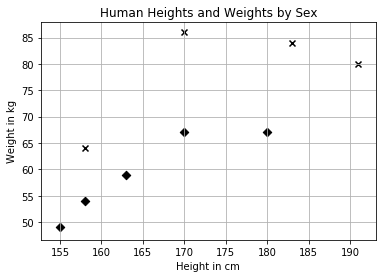

In [3]:
# Classification using KNN

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])

y_train = ['male', 'male', 'male', 'male', 
           'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')

plt.grid(True)
plt.show()

In [2]:
# calculating the euclidean distance of a sample instance (155cm, 70kg)
# to figure out the nearest neighbors

X_test = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - X_test)**2, axis=1))
print(distances)

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


In [4]:
# identify the indices and response values of the nearest neighbors
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

['male' 'female' 'female']


In [5]:
# use code to count and identify the feature vector class with maximum counts
from collections import Counter
b = Counter(np.take(y_train, nearest_neighbor_indices))
# print(b.most_common(1)[0][0])
print(b.most_common(1)[0][0])

female


In [6]:
# implementing the KNN classifier using scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
print(y_train_binarized)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [7]:
# implementing KNN now
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
y_pred_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
y_pred = lb.inverse_transform(y_pred_binarized)
print(y_pred[0])

female


In [18]:
# making predictions on a sample test set
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])

y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print(y_test_binarized)

[[1 1 0 0]]


In [19]:
print('Binarized Labels: ', y_test_binarized.T[0])
y_pred_binarized = clf.predict(X_test)
print('Binarized Predictions: ', y_pred_binarized)
y_pred = lb.inverse_transform(y_pred_binarized)
print('Predicted Labels: ', y_pred)

Binarized Labels:  [1 1 0 0]
Binarized Predictions:  [0 1 0 0]
Predicted Labels:  ['female' 'male' 'female' 'female']


In [25]:
# checking/validating the performance of the model

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_binarized, y_pred_binarized)))

# Precision
from sklearn.metrics import precision_score
print('Precision: {:.2f}'.format(precision_score(y_test_binarized, y_pred_binarized)))

# Recall
from sklearn.metrics import recall_score
print('Recall: {:.2f}'.format(recall_score(y_test_binarized, y_pred_binarized)))

# F1-Score
from sklearn.metrics import f1_score
print('F1-Score: {:.2f}'.format(f1_score(y_test_binarized, y_pred_binarized)))

# Matthew's Correlation Coefficient
from sklearn.metrics import matthews_corrcoef
print("Matthew's Correlation Coefficient: {:.2f}".format(matthews_corrcoef(y_test_binarized, y_pred_binarized)))

# Classification Report
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(y_test_binarized, y_pred_binarized, target_names=['male'], labels=[1]))

Accuracy: 0.75
Precision: 1.00
Recall: 0.50
F1-Score: 0.67
Matthew's Correlation Coefficient: 0.58
Classification Report: 
              precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



In [7]:
# regression with KNN.
# the same example, but now feature set will be 
# height and sex and we have to predict the weight

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])

y_test = [65, 96, 52, 67]

K = 3


In [9]:
# clf = KNeigborsRegressor(n_neighbors=K)

clf = KNeighborsRegressor(n_neighbors=K)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [10]:
print('Predicted Weights: ', predictions)
print('Coefficient of determination: ', r2_score(y_test, predictions))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))

Predicted Weights:  [70.66666667 79.         59.         70.66666667]
Coefficient of determination:  0.6290565226735438
Mean Absolute Error:  8.333333333333336
Mean Squared Error:  95.8888888888889


In [19]:
# scaling features example

from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([
    [1700, 1],
    [1600, 0]
])

X_test = np.array([1640, 1]).reshape(1, -1)

print('Eucliden Distances (mm):')
print('{:.4f}'.format(euclidean(X_train[0,:], X_test)))
print('{:.4f}'.format(euclidean(X_train[1,:], X_test)))


# heights in centimeters
X_train = np.array([
    [170, 1],
    [160, 0]
])

X_test = np.array([164, 1]).reshape(1, -1)

print('\nEucliden Distances (cm):')
print('{:.4f}'.format(euclidean(X_train[0,:], X_test)))
print('{:.4f}'.format(euclidean(X_train[1,:], X_test)))


# heights in meters
X_train = np.array([
    [1.7, 1],
    [1.6, 0]
])

X_test = np.array([1.64, 1]).reshape(1, -1)

print('\nEucliden Distances (m):')
print('{:.4f}'.format(euclidean(X_train[0,:], X_test)))
print('{:.4f}'.format(euclidean(X_train[1,:], X_test)))

Eucliden Distances (mm):
60.0000
40.0125

Eucliden Distances (cm):
6.0000
4.1231

Eucliden Distances (m):
0.0600
1.0008


In [21]:
# understanding and implementing StandardScaler
from sklearn.preprocessing import StandardScaler

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])

y_test = [65, 96, 52, 67]

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


/home/anshul/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
print('Predicted Weights: ', predictions)
print('Coefficient of determination: ', r2_score(y_test, predictions))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))

Predicted Weights:  [78.         83.33333333 54.         64.33333333]
Coefficient of determination:  0.6706425961745109
Mean Absolute Error:  7.583333333333336
Mean Squared Error:  85.13888888888893
